In [1]:
import cv2
import time 

import numpy as np
import matplotlib.pyplot as plt

import drawing_util as du

import tensorflow as tf
import numpy as np
import time
import os
from tqdm import tqdm

# Import matplotlib libraries

import util as ut
import save_utils as su
import cropping as cr

import movenet as mvn


cam = cv2.VideoCapture(0, cv2.CAP_DSHOW)
cam.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
cam.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

# ret_val, img = cam.read()


True

In [8]:
for i in range(100):
    ret_val, img = cam.read()
    small = cv2.resize(img, (256, 192))
    cv2.imshow('my webcam', small)
    if cv2.waitKey(1) == 27: 
        break  # esc to quit
cv2.destroyAllWindows()

In [6]:
for i in range(60):
    ret_val, img = cam.read()
    if ret_val:
        cv2.imshow('my webcam', img)

: 

In [2]:

movenet, input_size = mvn.choose_model(model_name="li")


In [12]:
cam = cv2.VideoCapture(0, cv2.CAP_DSHOW)
cam.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
cam.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

ret_val, img = cam.read()
convert_img = tf.convert_to_tensor(img)
crop_region = cr.init_crop_region(convert_img.shape[0], convert_img.shape[1])

for i in range(100):
    ret_val, img = cam.read()
    img = cv2.resize(img, (256, 192))
    convert_img = tf.convert_to_tensor(img)

    keypoints_with_scores = cr.run_inference(
                movenet, convert_img, crop_region,
                crop_size=[input_size, input_size])

    crop_region = cr.determine_crop_region(
                    keypoints_with_scores, convert_img.shape[0], convert_img.shape[1])

    cool_img = du.draw_prediction_on_image(
        img, keypoints_with_scores, crop_region, close_figure=False,
        output_image_height=convert_img.shape[0])
    
    cv2.imshow('my webcam', cool_img)
    if cv2.waitKey(1) == 27: 
        break  # esc to quit

cv2.destroyAllWindows()

In [3]:
convert_img = tf.convert_to_tensor(img)
crop_region = cr.init_crop_region(convert_img.shape[0], convert_img.shape[1])

keypoints_with_scores = cr.run_inference(
                movenet, convert_img, crop_region,
                crop_size=[input_size, input_size])

crop_region = cr.determine_crop_region(
                keypoints_with_scores, convert_img.shape[0], convert_img.shape[1])

cool_img = du.draw_prediction_on_image(
        img, keypoints_with_scores, crop_region, close_figure=False,
        output_image_height=convert_img.shape[0])

NameError: name 'cam' is not defined

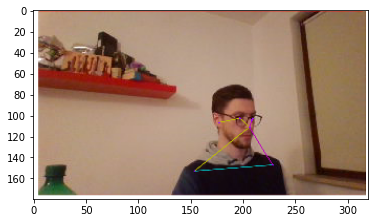

In [7]:
ret_val, img = cam.read()
color_image = cv2.cvtColor(cool_img,cv2.COLOR_BGR2RGB)
plt.imshow(color_image)
plt.show()

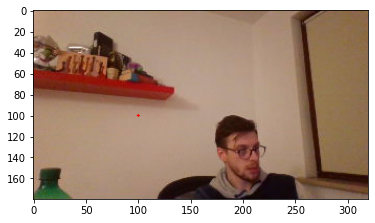

In [11]:
# cv2.imshow("Webcam", frame)


ret_val, img = cam.read()

# Display the array as an image using imshow
cv2.circle(img, (100, 100), 1, (0, 0, 255), -1)

color_image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(color_image)
plt.show()
